# Run the file containing the functions used in this script
## By default this is a file called "methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [156]:
methaneFunctions<-paste(getwd(),"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [95]:
# Package names
packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "ggpubr")
packageHandler(packages)

# 1. Hardcoded definitions that don't require loading anything?

# 2. Definitions that lead to or require processing data

### Location of data

In [4]:
conductivityDataDir<-"~/Desktop/data/Raw_Sensor_Data/WaterBear_TemperatureConductivity"

ch4DataDir<-"~/Desktop/data/Methane Calibration/Methane_Calibration_Anya/20230530"

co2DataDir<-"~/Desktop/data/Methane Calibration/field_test/20230424_deployment"
outputDir<-"~/Desktop/waterbear/thesisFigures"

#### Read in data

In [29]:
# conductivityData<-concat_dirs(directory = conductivityDataDir,readFn = read_rriv_CSV, minFileSize = 500)
# head(conductivityData)
# names(conductivityData)

In [31]:
ch4Data<-concat_dirs(directory = ch4DataDir,readFn = read_rriv_CSV, filePattern = "CSV", minFileSize = 500)
head(ch4Data)
names(ch4Data)

[1] "Dataframe generated, manually process column types if necessary"


,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,aht_C,aht_RH,ch4_raw,ch4_cal,user_note,user_value
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
7,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458322,2023-05-30 14:52:02.056,1075,35849,1,37.20,37.57,557,0,NA,NA
14,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458325,2023-05-30 14:52:04.529,1072,35849,1,37.22,37.49,559,0,NA,NA
21,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458327,2023-05-30 14:52:07.021,1072,35849,1,37.24,37.25,564,0,NA,NA
28,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458330,2023-05-30 14:52:09.513,1077,35849,1,37.26,37.22,571,0,NA,NA
35,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458332,2023-05-30 14:52:11.996,1087,35849,1,37.28,36.96,574,0,NA,NA
42,raw,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685458334,2023-05-30 14:52:14.487,1110,35849,1,37.29,37.09,581,0,NA,NA


[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"

In [44]:
ch4Data<-process_rriv_columns(ch4Data)

In [137]:
UUIDdict=c(
    "57FF6E068387575148360767"="1",
    "57FF6D068387575151290167"="2",
    "57FF6F068387575149330867"="3",
    "57FF6E068387575140070767"="4",
    "50FF74068678545256252467"="5")
UUIDdict

ch4Data<-createSensorColFromIDs(ch4Data,idCol = "uuid",dict = UUIDdict)

57FF6E068387575148360767 57FF6D068387575151290167 57FF6F068387575149330867 
                     "1"                      "2"                      "3" 
57FF6E068387575140070767 50FF74068678545256252467 
                     "4"                      "5"

In [138]:
unique(ch4Data$Sensor)

[1] "1" "2" "3" "4" "5"

In [139]:
lgrData<-concat_dirs(directory = ch4DataDir,readFn = read_GA_ZIP, filePattern = ".zip$", minFileSize = 500)
head(lgrData)
names(lgrData)

clean_temp()

[1] "Dataframe generated, manually process column types if necessary"


,Time,X.CH4._ppm,X.CH4._ppm_sd,X.CO2._ppm,X.CO2._ppm_sd,X.H2O._ppm,X.H2O._ppm_sd,X.CH4.d_ppm,X.CH4.d_ppm_sd,X.CO2.d_ppm,⋯,HZ_sd,Batt_v,Batt_v_sd,BattPer,BattPer_sd,Temp_Status_mA,Analyzer_Status_mA,Fit_Flag,MIU_VALVE,MIU_DESC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>
1,2023/05/30 15:02:26.062,39.5788,1.12080,453.960,0.368601,23583.2,420.429,40.5344,1.13050,464.925,⋯,0.000345907,5.23635,0.00115986,97.4017,0.0690392,20,20,3,1,NA
2,2023/05/30 15:04:07.572,34.9374,1.68788,453.808,0.514154,24561.3,348.813,35.8165,1.71784,465.234,⋯,0.000421865,5.23115,0.00190431,97.0920,0.1133520,20,20,3,3,NA
3,2023/05/30 15:05:49.093,29.9256,1.37917,451.921,0.609146,25366.2,257.982,30.7041,1.40713,463.683,⋯,0.000280181,5.22470,0.00202668,96.7085,0.1206360,20,20,3,5,NA
4,2023/05/30 15:07:30.662,32.4338,12.43320,451.165,0.728863,25657.0,308.675,33.2845,12.74520,463.046,⋯,0.000416917,5.21850,0.00134553,96.3396,0.0800914,20,20,3,7,NA
5,2023/05/30 15:09:12.167,63.2491,3.48820,452.068,1.043750,24992.9,196.565,64.8698,3.56483,463.656,⋯,0.000340352,5.21275,0.00198259,95.9973,0.1180110,20,20,3,1,NA
6,2023/05/30 15:10:53.683,53.2205,2.59190,448.472,0.911935,25774.6,275.669,54.6279,2.64509,460.336,⋯,0.000396292,5.20606,0.00217960,95.5990,0.1297380,20,20,3,3,NA


[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

In [140]:
lgrData$Time<-lubridate::as_datetime(lgrData$Time)

str(lgrData)

'data.frame':	76 obs. of  37 variables:
 $ Time              : POSIXct, format: "2023-05-30 15:02:26" "2023-05-30 15:04:07" ...
 $ X.CH4._ppm        : num  39.6 34.9 29.9 32.4 63.2 ...
 $ X.CH4._ppm_sd     : num  1.12 1.69 1.38 12.43 3.49 ...
 $ X.CO2._ppm        : num  454 454 452 451 452 ...
 $ X.CO2._ppm_sd     : num  0.369 0.514 0.609 0.729 1.044 ...
 $ X.H2O._ppm        : num  23583 24561 25366 25657 24993 ...
 $ X.H2O._ppm_sd     : num  420 349 258 309 197 ...
 $ X.CH4.d_ppm       : num  40.5 35.8 30.7 33.3 64.9 ...
 $ X.CH4.d_ppm_sd    : num  1.13 1.72 1.41 12.75 3.56 ...
 $ X.CO2.d_ppm       : num  465 465 464 463 464 ...
 $ X.CO2.d_ppm_sd    : num  0.576 0.373 0.507 0.614 0.985 ...
 $ GasP_torr         : num  501 501 501 501 501 ...
 $ GasP_torr_sd      : num  0.0212 0.0366 0.0406 0.0439 0.0363 ...
 $ GasT_C            : num  26.3 26.9 27.7 28.4 29.2 ...
 $ GasT_C_sd         : num  0.133 0.226 0.235 0.241 0.241 ...
 $ AmbT_C            : num  30.3 31.4 32.5 33.5 34.4 ...
 $ Am

In [141]:
co2Data<-concat_dirs(directory = co2DataDir,readFn = read_rriv_CSV, filePattern="CSV", minFileSize = 500)
head(co2Data)
names(co2Data)

[1] "Dataframe generated, manually process column types if necessary"


,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,dht_C,dht_RH,atlas_CO2_ppm,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
9,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374938,2023-04-24 22:22:17.814,1320,1,1,18.9,29.0,1595,1926,0,1127,0,NA,NA
16,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374940,2023-04-24 22:22:20.281,1237,1,1,18.9,29.0,1593,1929,0,1124,0,NA,NA
23,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374943,2023-04-24 22:22:22.732,1222,1,1,19.0,31.0,1592,1926,0,1123,0,NA,NA
30,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374945,2023-04-24 22:22:25.198,1223,1,1,19.0,31.0,1590,1927,0,1123,0,NA,NA
37,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374948,2023-04-24 22:22:27.652,1221,1,1,19.0,31.1,1589,1925,0,1125,0,NA,NA
44,raw,PWAD2,21011,fieldCal_CH002-57FF6C068387575136470767-1682374856,1682374856,57FF6C068387575136470767,1682374950,2023-04-24 22:22:30.116,1220,1,1,19.0,31.1,1587,1926,0,1123,0,NA,NA


[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "dht_C"           
[13] "dht_RH"           "atlas_CO2_ppm"    "ch4rf_raw"        "ch4rf_cal"       
[17] "ch4_raw"          "ch4_cal"          "user_note"        "user_value"

# Figures

In [142]:
# CH4 vs lgr
names(ch4Data)
names(lgrData)

range_ch4<-range(ch4Data$time.h)
range_ch4

range_lgr<-range(lgrData$Time)
range_lgr

overlapStart<-max(range_lgr[1], range_ch4[1])
overlapEnd<-min(range_lgr[2], range_ch4[2])

overlapStart
overlapEnd

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4_raw"          "ch4_cal"          "user_note"       
[17] "user_value"       "Sensor"

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

[1] "2023-05-30 14:51:02 UTC" "2023-05-30 17:20:25 UTC"

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:20 UTC"

[1] "2023-05-30 15:02:26 UTC"

[1] "2023-05-30 17:09:20 UTC"

In [143]:
# initial subset of ch4 and lgr data
ol_ch4<-ch4Data[ch4Data$time.h>overlapStart & ch4Data$time.h<overlapEnd,]
ol_lgr<-lgrData[lgrData$Time>overlapStart & lgrData$Time<overlapEnd,]

range(ol_ch4$time.h)
range(ol_lgr$Time)

[1] "2023-05-30 15:02:26 UTC" "2023-05-30 17:09:19 UTC"

[1] "2023-05-30 15:04:07 UTC" "2023-05-30 17:07:39 UTC"

In [144]:
ol_ch4_summary<-ol_ch4[ol_ch4$type=="summary",]
head(ol_ch4_summary)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,aht_C,aht_RH,ch4_raw,ch4_cal,user_note,user_value,Sensor
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
900,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459006,2023-05-30 15:03:25,1159,35849,12,37.288,46.330,680.5,0,NA,NA,1
975,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459066,2023-05-30 15:04:25,1155,35849,13,37.427,46.559,666.9,0,NA,NA,1
1050,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459126,2023-05-30 15:05:25,1154,35849,14,37.559,46.719,655.1,0,NA,NA,1
1125,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459186,2023-05-30 15:06:25,1153,35849,15,37.643,46.796,644.7,0,NA,NA,1
1200,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459246,2023-05-30 15:07:25,1205,35849,16,37.718,46.902,808.3,0,NA,NA,1
1275,summary,PDock1,CAL1,PWAdock-cal1.1-57FF6E068387575148360767-1685455590,1685455590,57FF6E068387575148360767,1685459306,2023-05-30 15:08:25,1199,35849,17,37.787,46.996,794.5,0,NA,NA,1


# interpolate summary ch4 lines and lgr data

In [145]:
# Manually create dictionary for column names, and what to rename them to in output df
interpolateDict<-c(
        "ch4_raw"="ch4_raw_rriv",
        "aht_C"="aht_C",
        "aht_RH"="aht_RH",
        "dht_C"="dht_C",
        "dht_RH"="dht_RH",
        "X.CH4._ppm"="ch4_ppm_lgr")

In [146]:
interpolateData<-function(df1=ol_ch4_summary, df1TimeCol="time.h",
                          df2=ol_lgr, df2TimeCol="Time",
                          iDict=interpolateDict){
    iD<-iDict
    iKeys<-names(iD)
    
    # extract time range for first data frame
    df1r<-range(df1[[ df1TimeCol ]])

    # extract time range for second data frame
    df2r<-range(df2[[ df2TimeCol ]])

    # create output dataframe using whichever time range is larger
    # use sequence to create minute intervals across the range for data points in a new dataframe
    if(df1r[2]-df1r[1] > df2r[2]-df2r[1]){
        print("df1 time range is larger")
        outputDF<-data.frame(time_utc=seq(df1r[1],df1r[2], by="min"))
    } else{
        print("df2 time range is larger")
        outputDF<-data.frame(time_utc=seq(df2r[1],df2r[2], by="min"))
    }
    
    # extract column names from dataframe 1
    cols<-names(df1)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df1[[df1TimeCol]], df1[[key]], outputDF[["time_utc"]])$y
    }

    # extract column names from dataframe 2
    cols<-names(df2)

    # only interpolate data that is both in the dictionary and in the column names
    for(key in iKeys[iKeys %in% cols]){
        outputDF[[ iD[[key]] ]]<-approx(df2[[df2TimeCol]], df2[[key]], outputDF[["time_utc"]])$y
    }

    # remove lines with NA
    outputDF<-outputDF[complete.cases(outputDF),]
    
    return(outputDF)
}

In [147]:
# interpolate data for each uuid then merge via rbind()
interpolated_data<-data.frame()

sensorList<-unique(ol_ch4_summary$Sensor)

for(sensor in sensorList){
    subset<-ol_ch4_summary[ol_ch4_summary$Sensor==sensor,]
    temp<-interpolateData(df1=subset)
    temp$Sensor=sensor
    interpolated_data<-rbind(interpolated_data, temp)
}
unique(interpolated_data$Sensor)

[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"
[1] "df1 time range is larger"


[1] "1" "2" "3" "4" "5"

In [148]:
# custom color blind color palettes:
# https://davidmathlogic.com/colorblind/#%237000CC-%23E22C7B-%23FFAF2A-%2300CACA-%23046CC5-%23CB60E6-%23349634-%23E47D00
custom_colors=c('#7000CC','#E22C7B','#FFAF2A','#00CACA','#046CC5','#CB60E6','#349634','#E47D00') #00AAAA

In [149]:
# +
#         geom_point(size=2)+geom_line(size=1)+theme_classic(base_size=18)+
#         labs(x="Time (hr:min)", y=ylabs[i], color="Logger")+
#         scale_color_manual(values=custom_colors,na.translate=F)+
#         scale_x_datetime(date_labels="%H:%M",breaks=scales::pretty_breaks(n=4),expand=c(0,60*1.5))

In [150]:
range(interpolated_data$time_utc)

[1] "2023-05-30 15:04:25 UTC" "2023-05-30 17:07:26 UTC"

In [154]:
timeStart<-lubridate::as_datetime("2023-05-30 15:00:00 UTC")
timeEnd<-lubridate::as_datetime("2023-05-30 16:00:00 UTC")

subset<-interpolated_data[interpolated_data$time_utc>timeStart & interpolated_data$time_utc<timeEnd,]

A<-ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv, color=Sensor))+geom_line(size=1)+
theme_classic(base_size=12)+
labs(x="UTC Time",y="CH4 RRIV digital reading")+
scale_color_manual(values=custom_colors, name ="RRIV")

B<-ggplot(subset, aes(x=time_utc, y=ch4_ppm_lgr))+geom_line(size=1)+
theme_classic(base_size=12)+
labs(x="UTC Time",y="CH4 LGR (ppm)")

C<-ggplot(subset, aes(x=time_utc, y=aht_C, color=Sensor))+geom_line(size=1)+
theme_classic(base_size=12)+
labs(x="UTC Time",y="Temperature (C)")+
scale_color_manual(values=custom_colors, name ="RRIV")

D<-ggplot(subset, aes(x=time_utc, y=aht_RH, color=Sensor))+geom_line(size=1)+
theme_classic(base_size=12)+
labs(x="UTC Time",y="Relative Humidity (%)")+
scale_color_manual(values=custom_colors, name ="RRIV")

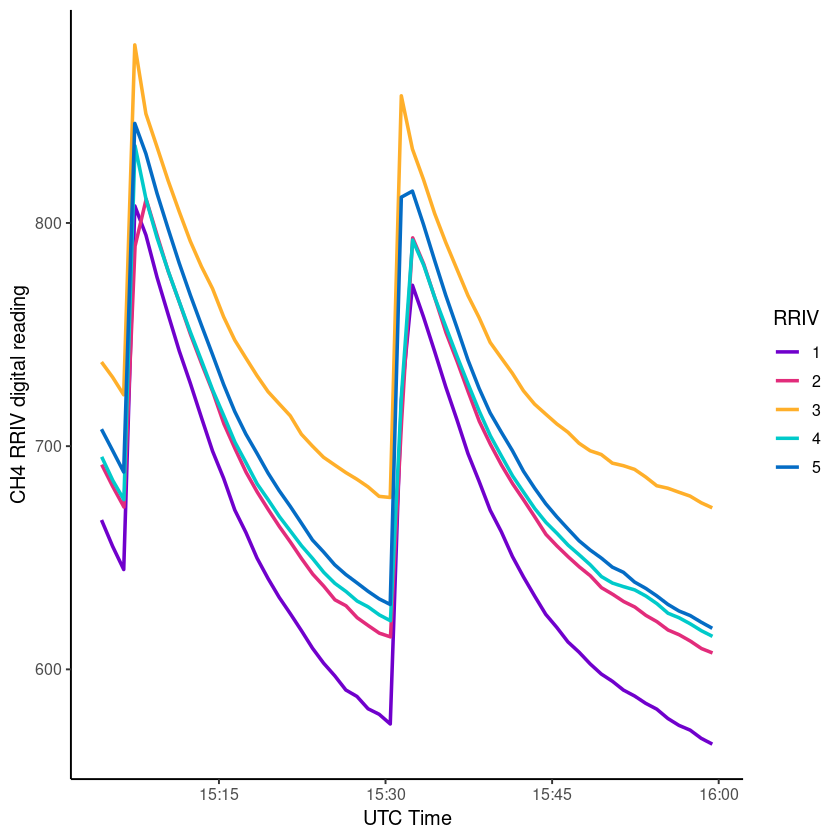

In [152]:
ggplot(subset, aes(x=time_utc, y=ch4_raw_rriv, color=Sensor))+geom_line(size=1)+
theme_classic(base_size=12)+
labs(x="UTC Time",y="CH4 RRIV digital reading")+
scale_color_manual(values=custom_colors, name="RRIV")

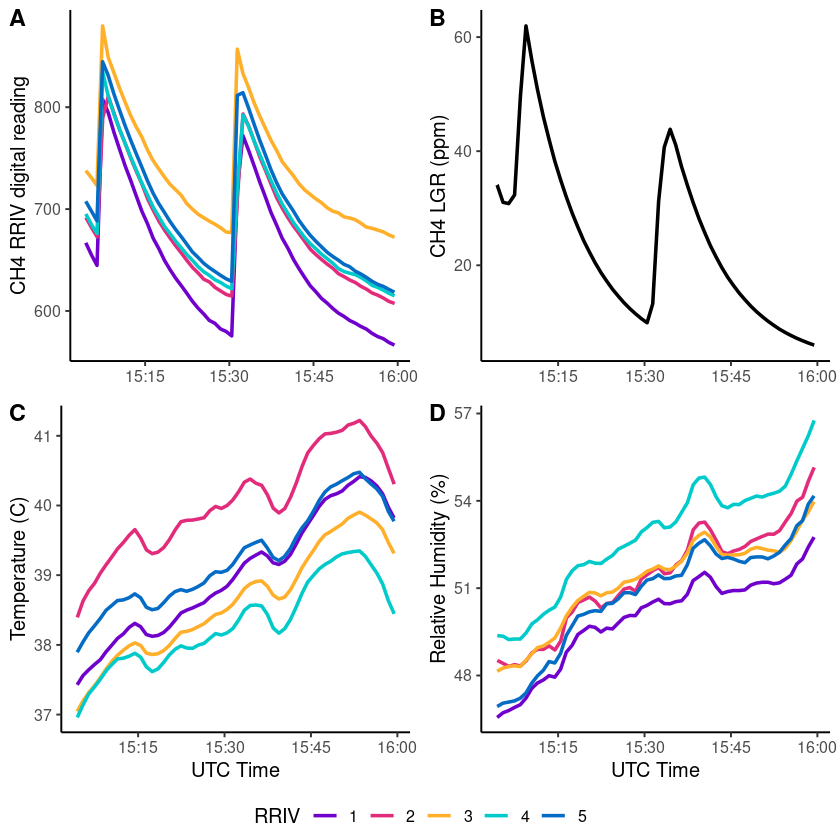

In [159]:
methaneConfiguration<-ggarrange(A+rremove("legend")+rremove("x.title"),
          B+rremove("x.title"),
          C+rremove("legend"),
          D+rremove("legend"),
          labels=c("A","B","C","D"),
          common.legend=TRUE,
          legend="bottom"
         )
methaneConfiguration

In [160]:

savePlot(plot = test,tag = "methaneConfiguration")

png 
  2